In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [258]:
df = pd.read_csv(r'C:\data\Wine_clust.csv')

In [259]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [260]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [262]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [263]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#K-Means Clustering

#Elbow Method

In [264]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


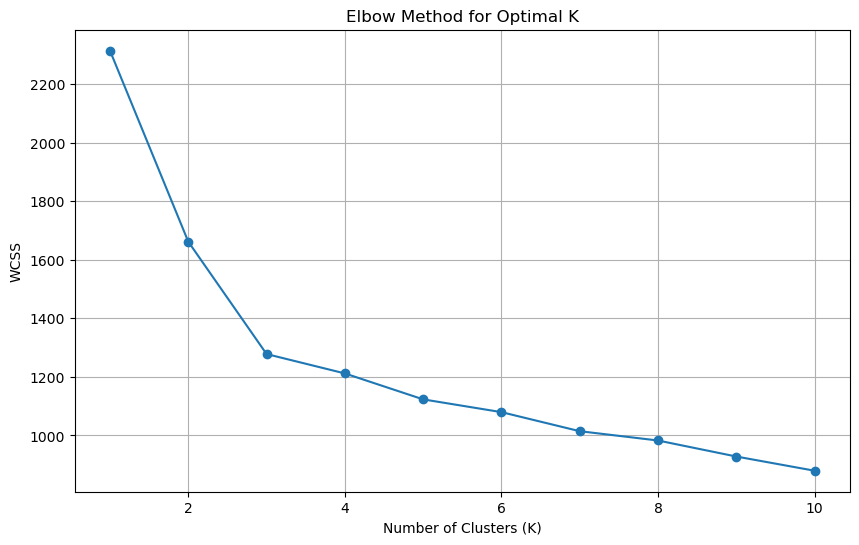

In [265]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [266]:
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans_optimal.fit_predict(scaled_data)


In [267]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [268]:
df['KMeans_Cluster'] = clusters
print("\nOptimal K-Means Clustering Results:")
df.sort_values(by='KMeans_Cluster')



Optimal K-Means Clustering Results:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMeans_Cluster
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,0
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,0
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,0
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,0
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,2
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,2
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,2
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985,2


#Silhouette Method

In [269]:
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

In [270]:
 silhouette_scores

[np.float64(0.2650328591008738),
 np.float64(0.2848589191898987),
 np.float64(0.25422758316007776),
 np.float64(0.18362105107698137),
 np.float64(0.16899191019013057),
 np.float64(0.1726015561094921),
 np.float64(0.16250411307671142),
 np.float64(0.17387393345450863),
 np.float64(0.1395672366429755)]

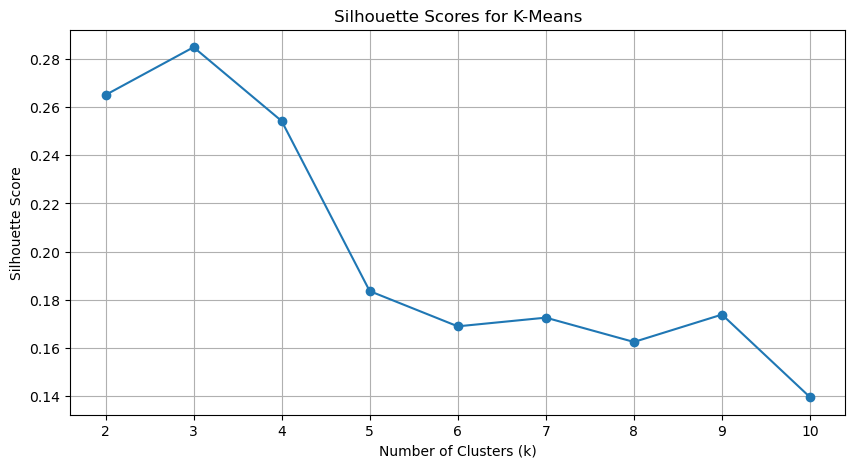

In [271]:
plt.figure(figsize=(10, 5))
plt.plot(k_range_sil, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [272]:
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]

In [273]:
optimal_k

3

#Agglomerative Hierarchical Clustering

#Dendogram

In [ ]:
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.axhline(y=19, color='r', linestyle='--')
plt.show()

#Silhouette Scores 

In [ ]:
sil_scores1 = []
for i in range(2,10):
    ahc = AgglomerativeClustering(n_clusters = i, metric = 'euclidean',linkage = 'ward')
    y_ahc = ahc.fit_predict(scaled_data)
    s_score1 = silhouette_score(scaled_data, y_ahc)
    sil_scores1.append(s_score1)

In [ ]:
 sil_scores1

In [ ]:
plt.figure(figsize = (6,4))
x = range(2,10)
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.plot(x,sil_scores1,label = 'Silhouette_score')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette_score')
plt.grid(True)
plt.show()
[ ]

In [ ]:
optimal_n_clusters = 3
ahc = AgglomerativeClustering(n_clusters = optimal_n_clusters,metric='euclidean', linkage='ward')
y_ahc = ahc.fit_predict(scaled_data)

In [ ]:
y_ahc

In [ ]:
sil_ahc = silhouette_score(scaled_data, y_ahc)

In [ ]:
sil_ahc

In [ ]:
df['Hierarchical_Cluster'] = y_ahc
print("\nAgglomerative Clustering Results:")
df.sort_values(by= 'Hierarchical_Cluster')


In [ ]:
optimal_k1 = range(2, 11)[np.argmax(sil_scores1)]

In [ ]:
optimal_k1

#DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [ ]:
min_samples_db = 2 * scaled_data.shape[1]

In [ ]:

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples_db)
neighbors_fit=nearest_neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

In [ ]:
sorted_distances = np.sort(distances[:, min_samples_db-1], axis=0)

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{min_samples_db}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [ ]:
optimal_eps =3.1
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples_db)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [ ]:
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)


In [ ]:
print("Estimated number of clusters: ",n_clusters_)
print("Cluster labels:", dbscan_labels)

In [ ]:
df['DBSCAN_Cluster']=dbscan_labels
df.sort_values(by='DBSCAN_Cluster')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)


In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
pca_df['KMeans_Labels'] = clusters
pca_df['Agglomerative_Labels'] = y_ahc
pca_df['DBSCAN_Labels'] = dbscan_labels


In [ ]:
#  Visualize K-Means clusters 

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Labels', data=pca_df, palette='viridis', legend='full')
plt.title('K-Means Clustering')

# Visualize Agglomerative clusters 
plt.subplot(1, 3, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Agglomerative_Labels', data=pca_df, palette='viridis', legend='full')
plt.title('Agglomerative Clustering')

#Visualize DBSCAN clusters 
plt.subplot(1, 3, 3)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Labels', data=pca_df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

In [ ]:
# K-Means Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, clusters)
print("K-Means Silhouette Score with 3 clusters:", kmeans_silhouette)

# Agglomerative Silhouette Score
agg_silhouette = silhouette_score(scaled_data, y_ahc)
print("Agglomerative Silhouette Score with 3 clusters:", agg_silhouette)

# DBSCAN Silhouette Score (handle case with noise)
dbscan_labels_no_noise = dbscan_labels[dbscan_labels != -1]
if len(np.unique(dbscan_labels_no_noise)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data[dbscan_labels != -1], dbscan_labels_no_noise)
    print("DBSCAN Silhouette Score (excluding noise):",dbscan_silhouette)
else:
    print("DBSCAN resulted in one or no clusters (after removing noise), so a silhouette score cannot be calculated.")

print("\nThe choice of the  model depends on the specific goals of the analysis. A higher silhouette score generally indicates better-defined clusters.")